In [1]:
data = read.table("configs/data/atac_versus_dnase_profile_compare.tsv", sep=",",header=FALSE)

In [2]:
data

V1,V2,V3
<chr>,<chr>,<dbl>
AP1,ATAC,0.124637502
ARNTL,ATAC,0.021760145
CTCF,ATAC,0.255116102
DIMER,ATAC,0.009851710
ELK,ATAC,0.066041422
FOSL1+JUN,ATAC,0.018695625
GATA,ATAC,0.130293495
GC,ATAC,0.040640875
NFIA,ATAC,0.016536065


In [3]:
new_data = data[data["V2"]=="ATAC",]

In [4]:
new_data = aggregate(V3 ~ V1, new_data, sum)    
new_data

V1,V3
<chr>,<dbl>
AP1,0.124637502
ARNTL,0.021760145
CTCF,0.255116102
DIMER,0.009851710
ELK,0.066041422
FOSL1+JUN,0.018695625
GATA,0.130293495
GC,0.040640875
NFIA,0.016536065


In [5]:
new_data[order(new_data$V3, decreasing=TRUE),"V1"]

[1] "CTCF"      "SP1/KLF"   "GATA"      "AP1"       "ELK"       "NFYB"     
 [7] "GC"        "ARNTL"     "NRF1"      "FOSL1+JUN" "TYY1"      "ZNF76"    
[13] "NFIA"      "DIMER"     "ZBTB33"    "RFX"       "REST"      "STA5A"

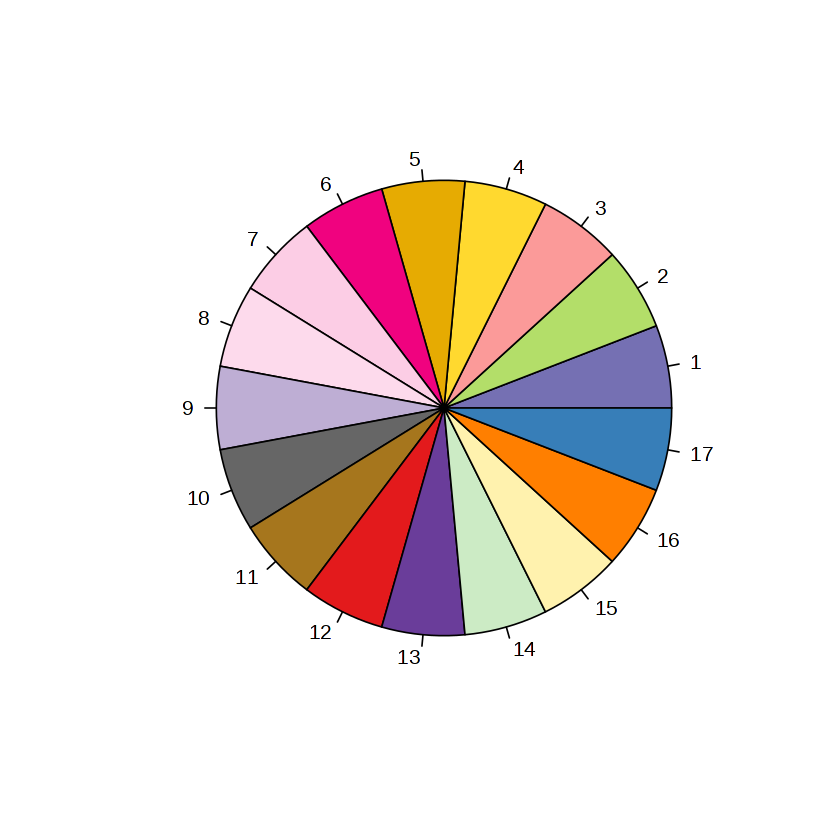

In [6]:
library(RColorBrewer)
n <- 17
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
pie(rep(1,n), col=sample(col_vector, n))

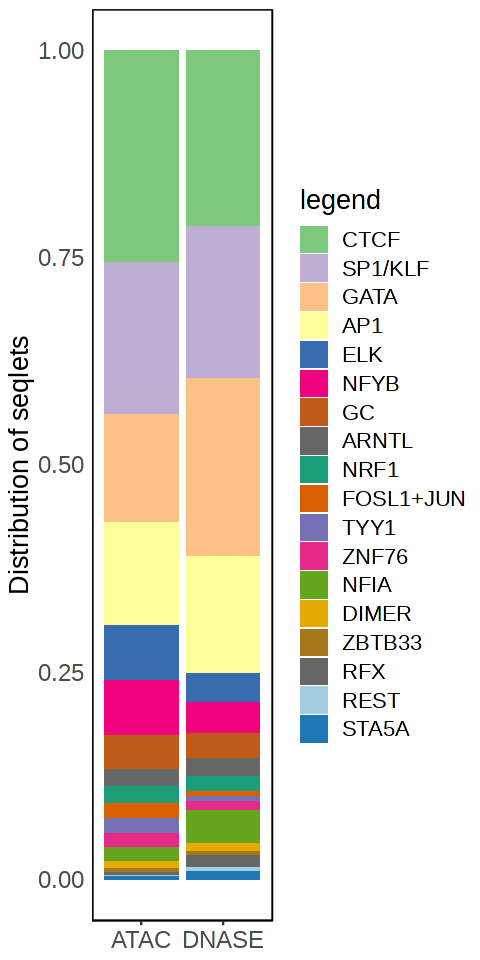

In [8]:
library(ggplot2)
#data
options(repr.plot.width = 4, repr.plot.height = 8)

ggplot(data, aes(x=V2, y=V3, fill=factor(V1, levels=new_data[order(new_data$V3, decreasing=TRUE),"V1"]))) +
geom_bar(position='fill', stat='identity') +
theme_classic() +
theme(plot.title = element_text(hjust = 0.5),
    text = element_text(size=16),
    axis.line=element_blank(),
    axis.ticks.y=element_blank(),
    axis.title.x=element_blank(),
    axis.text.x = element_text(angle=0, vjust=0.5, hjust=0.5, size=14),
    axis.text.y = element_text(size=14),
    panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +  scale_x_discrete(limits =c("ATAC","DNASE")) +
scale_fill_manual("legend", values = col_vector) +
ylab("Distribution of seqlets")
ggsave("subfigs/modisco_compare/modisco_distribution_benchamrking.pdf", width=4, height=8)
